Goal: Predict coffee shop ratings

Overall Process:

1. Data Cleaning: 100+ columns with 5 files combined, eliminate NaN values in a sensible, non-intrusive way
2. Simple Linear Regression
3. Logistic Regression
4. Random Forest
5. Feature Selection based on model scores
6. Feature Extraction from underlying data

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sns
import json
import os



In [2]:
pd.set_option("display.max_columns",200)

In [3]:
pd.set_option("display.max_row",200)

In [4]:
business = pd.read_csv('yelp_academic_dataset_business.csv')

/Users/veronica/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,7,17,26,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


For this analysis, user features are not used to predict business's rating

In [101]:
#user = pd.read_csv('yelp_academic_dataset_user.csv')


In [6]:
review = pd.read_csv('yelp_academic_dataset_review_nonText.csv')


In [7]:
checkin = pd.read_csv('yelp_academic_dataset_checkin.csv')

In [8]:
business.shape

(85901, 98)

In [9]:
business.head()

,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,attributes.Good For.latenight,attributes.Outdoor Seating,attributes.Alcohol,attributes.Ambience.classy,attributes.By Appointment Only,attributes.Parking.lot,business_id,attributes.Ambience.touristy,attributes.Corkage,hours.Tuesday.open,attributes.Good For.brunch,categories,attributes.Waiter Service,hours.Monday.open,name,attributes.Parking.street,attributes.Ambience.hipster,attributes.BYOB/Corkage,attributes.Hair Types Specialized In.straightperms,attributes.Music.live,attributes.Dietary Restrictions.dairy-free,attributes.Music.background_music,attributes.Price Range,attributes.Good For.breakfast,attributes.Parking.garage,attributes.Music.karaoke,attributes.Good For Dancing,review_count,attributes.Hair Types Specialized In.asian,state,attributes.Accepts Credit Cards,hours.Friday.close,attributes.Good For.lunch,attributes.Parking.valet,attributes.Take-out,full_address,hours.Thursday.close,attributes.Hair Types Specialized In.coloring,attributes.Good For.dessert,attributes.Music.video,attributes.Dietary Restrictions.halal,attributes.Takes Reservations,hours.Saturday.open,attributes.Ages Allowed,attributes.Ambience.trendy,attributes.Delivery,hours.Wednesday.close,attributes.Wi-Fi,open,city,attributes.Wheelchair Accessible,attributes.Dietary Restrictions.gluten-free,stars,attributes.Dietary Restrictions.kosher,type,attributes.Caters,attributes.Ambience.intimate,latitude,attributes.Good For.dinner,attributes.Coat Check,longitude,hours.Monday.close,attributes.Hair Types Specialized In.extensions,hours.Tuesday.close,hours.Saturday.close,attributes.Good for Kids,attributes.Parking.validated,hours.Sunday.open,attributes.Accepts Insurance,attributes.Music.dj,attributes.Dietary Restrictions.soy-free,attributes.Has TV,hours.Sunday.close,attributes.Ambience.casual,attributes.Hair Types Specialized In.perms,attributes.Dogs Allowed,attributes.Drive-Thru,attributes.Dietary Restrictions.vegetarian,hours.Wednesday.open,attributes.Noise Level,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale
0,False,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,False,False,none,False,NaN,False,5UmKMjUEUNdYWqANhGckJw,False,NaN,11:00,False,"['Fast Food', 'Restaurants']",False,11:00,Mr Hoagie,False,False,NaN,NaN,NaN,NaN,NaN,1.0,False,False,NaN,NaN,7,NaN,PA,True,21:00,False,False,True,"4734 Lebanon Church Rd\nDravosburg, PA 15034",21:00,NaN,False,NaN,NaN,False,NaN,NaN,False,False,21:00,NaN,True,Dravosburg,NaN,NaN,3.5,NaN,business,False,False,40.354327,False,NaN,-79.900706,21:00,NaN,21:00,NaN,True,False,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,False,NaN,11:00,average,NaN,casual,NaN,True,[],NaN,False,NaN,False
1,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,UsFtqoBl7naz8AVUBZMjQQ,NaN,NaN,NaN,NaN,['Nightlife'],NaN,NaN,Clancy's Pub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5,NaN,PA,True,NaN,NaN,NaN,NaN,"202 McClure St\nDravosburg, PA 15034",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Dravosburg,NaN,NaN,3.0,NaN,business,NaN,NaN,40.350553,NaN,NaN,-79.886814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,[],NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cE27W9VPgO88Qxe4ol6y_g,NaN,NaN,NaN,NaN,"['Active Life', 'Mini Golf', 'Golf']",NaN,NaN,Cool Springs Golf Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,PA,NaN,NaN,NaN,NaN,NaN,"1530 Hamilton Rd\nBethel Park, PA 15234",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Bethel Park,NaN,NaN,2.5,NaN,business,NaN,NaN,40.354116,NaN,NaN,-80.014660,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,Na

In [10]:
business.categories.dropna(inplace=True)

In [11]:
business.categories

0                             ['Fast Food', 'Restaurants']
1                                            ['Nightlife']
2                     ['Active Life', 'Mini Golf', 'Golf']
3        ['Bars', 'American (New)', 'Nightlife', 'Loung...
4                                  ['Active Life', 'Golf']
5        ['Bars', 'American (Traditional)', 'Nightlife'...
6                   ['Auto Repair', 'Automotive', 'Tires']
7                             ['Active Life', 'Mini Golf']
8        ['Roofing', 'Home Services', 'Decks & Railing'...
9                                ['Veterinarians', 'Pets']
10           ['Libraries', 'Public Services & Government']
11                 ['Automotive', 'Auto Parts & Supplies']
12       ['Burgers', 'Breakfast & Brunch', 'American (T...
13                                     ['Food', 'Grocery']
14                ['Automotive', 'Gas & Service Stations']
15       ['Local Services', 'Dry Cleaning & Laundry', '...
16                ['Automotive', 'Gas & Service Stations

In [13]:
## Construct a new table with only "Coffee & Tea" as one of the categories

biz_copy = business.copy()
biz_coffee = biz_copy[biz_copy.categories.str.contains('Coffee & Tea')]
biz_coffee.head()

,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,attributes.Good For.latenight,attributes.Outdoor Seating,attributes.Alcohol,attributes.Ambience.classy,attributes.By Appointment Only,attributes.Parking.lot,business_id,attributes.Ambience.touristy,attributes.Corkage,hours.Tuesday.open,attributes.Good For.brunch,categories,attributes.Waiter Service,hours.Monday.open,name,attributes.Parking.street,attributes.Ambience.hipster,attributes.BYOB/Corkage,attributes.Hair Types Specialized In.straightperms,attributes.Music.live,attributes.Dietary Restrictions.dairy-free,attributes.Music.background_music,attributes.Price Range,attributes.Good For.breakfast,attributes.Parking.garage,attributes.Music.karaoke,attributes.Good For Dancing,review_count,attributes.Hair Types Specialized In.asian,state,attributes.Accepts Credit Cards,hours.Friday.close,attributes.Good For.lunch,attributes.Parking.valet,attributes.Take-out,full_address,hours.Thursday.close,attributes.Hair Types Specialized In.coloring,attributes.Good For.dessert,attributes.Music.video,attributes.Dietary Restrictions.halal,attributes.Takes Reservations,hours.Saturday.open,attributes.Ages Allowed,attributes.Ambience.trendy,attributes.Delivery,hours.Wednesday.close,attributes.Wi-Fi,open,city,attributes.Wheelchair Accessible,attributes.Dietary Restrictions.gluten-free,stars,attributes.Dietary Restrictions.kosher,type,attributes.Caters,attributes.Ambience.intimate,latitude,attributes.Good For.dinner,attributes.Coat Check,longitude,hours.Monday.close,attributes.Hair Types Specialized In.extensions,hours.Tuesday.close,hours.Saturday.close,attributes.Good for Kids,attributes.Parking.validated,hours.Sunday.open,attributes.Accepts Insurance,attributes.Music.dj,attributes.Dietary Restrictions.soy-free,attributes.Has TV,hours.Sunday.close,attributes.Ambience.casual,attributes.Hair Types Specialized In.perms,attributes.Dogs Allowed,attributes.Drive-Thru,attributes.Dietary Restrictions.vegetarian,hours.Wednesday.open,attributes.Noise Level,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale
35,NaN,NaN,NaN,06:00,NaN,NaN,NaN,NaN,07:00,NaN,True,none,NaN,False,False,3gmBc0qN_LtGbZAjTtHWZg,NaN,NaN,06:00,NaN,"['Food', 'Coffee & Tea']",NaN,06:00,Starbucks,True,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,False,NaN,NaN,25,NaN,PA,True,22:30,NaN,False,True,"270 W Bridge St\nHomestead\nHomestead, PA 15120",22:30,NaN,NaN,NaN,NaN,NaN,07:00,NaN,NaN,False,21:30,free,True,Homestead,True,NaN,3.5,NaN,business,NaN,NaN,40.407091,NaN,NaN,-79.916958,21:30,NaN,21:30,21:00,NaN,False,06:00,NaN,NaN,NaN,NaN,21:30,NaN,NaN,NaN,NaN,NaN,06:00,NaN,NaN,NaN,NaN,NaN,['Homestead'],NaN,NaN,NaN,NaN
148,False,NaN,NaN,07:00,NaN,NaN,NaN,NaN,07:00,False,True,none,False,NaN,False,83_p9vIqOq1TUIf3_GD7bA,False,NaN,07:00,False,"['Food', 'Coffee & Tea', 'Cafes', 'Restaurants']",False,07:00,Tazza D'oro Cafe & Espresso Bar,True,False,NaN,NaN,NaN,NaN,NaN,1.0,True,False,NaN,NaN,117,NaN,PA,True,19:00,False,False,True,1125 N Highland Ave\nHighland Park\nPittsburgh...,19:00,NaN,False,NaN,NaN,False,08:00,NaN,False,False,19:00,free,True,Pittsburgh,True,NaN,4.5,NaN,business,False,False,40.474888,False,NaN,-79.918866,19:00,NaN,19:00,19:00,True,False,08:00,NaN,NaN,NaN,False,19:00,True,NaN,NaN,NaN,NaN,07:00,average,NaN,casual,NaN,True,['Highland Park'],NaN,False,NaN,False
184,False,NaN,NaN,08:00,NaN,NaN,NaN,NaN,08:00,False,False,none,False,NaN,False,PzG0XmAmtXFs6Fdnubf41g,False,NaN,08:00,True,"['Food', 'Coffee & Tea', 'Vegetarian', 'Restau...",True,08:00,Quiet Storm Vegetarian & Vegan Cafe,True,True,yes_corkage,NaN,NaN,NaN,NaN,1.0,True,False,NaN,NaN,144,NaN,PA,True,22:00,True,False,

In [14]:
biz_coffee.shape

(2402, 98)

In [15]:
biz_coffee.columns

Index([u'attributes.Ambience.divey', u'attributes.Dietary Restrictions.vegan',
       u'attributes.Happy Hour', u'hours.Thursday.open',
       u'attributes.Order at Counter',
       u'attributes.Hair Types Specialized In.africanamerican',
       u'attributes.Hair Types Specialized In.kids', u'attributes.BYOB',
       u'hours.Friday.open', u'attributes.Good For.latenight',
       u'attributes.Outdoor Seating', u'attributes.Alcohol',
       u'attributes.Ambience.classy', u'attributes.By Appointment Only',
       u'attributes.Parking.lot', u'business_id',
       u'attributes.Ambience.touristy', u'attributes.Corkage',
       u'hours.Tuesday.open', u'attributes.Good For.brunch', u'categories',
       u'attributes.Waiter Service', u'hours.Monday.open', u'name',
       u'attributes.Parking.street', u'attributes.Ambience.hipster',
       u'attributes.BYOB/Corkage',
       u'attributes.Hair Types Specialized In.straightperms',
       u'attributes.Music.live', u'attributes.Dietary Restrictions.d

## Given the number of columns, start by looking at NA value count

In [16]:
na_count = []
na_name = []
for c in biz_coffee.columns:
    na_count.append(len(biz_coffee[biz_coffee[c].isnull()]))
    na_name.append(c)
na = zip(na_name,na_count)

In [17]:
df_na = pd.DataFrame(na,columns=['na_name','na_count'])

In [24]:
df_na['count_total'] = df_na.na_count.divide(len(biz_coffee.business_id))

In [25]:
df_na = df_na.sort_values('na_count')

In [26]:
df_na.head(30)

,na_name,na_count,count_total
61,stars,0,0.000000
15,business_id,0,0.000000
69,longitude,0,0.000000
38,state,0,0.000000
23,name,0,0.000000
20,categories,0,0.000000
36,review_count,0,0.000000
66,latitude,0,0.000000
63,type,0,0.000000
44,full_address,0,0.000000


In [790]:
df_na.describe()

,na_count
count,98.00000
mean,1453.27551
std,907.83140
min,0.00000
25%,676.25000
50%,1725.00000
75%,2383.25000
max,2402.00000


if a column is missing almost 20% of the value, it's safer to drop it given the number of column without missing values

In [29]:
df_na.iloc[:23]

,na_name,na_count,count_total
61,stars,0,0.000000
15,business_id,0,0.000000
69,longitude,0,0.000000
38,state,0,0.000000
23,name,0,0.000000
20,categories,0,0.000000
36,review_count,0,0.000000
66,latitude,0,0.000000
63,type,0,0.000000
44,full_address,0,0.000000


The above are some key important features relevant to coffee shop, as you see, most data is filled, to avoid dropping coffee shop just because the data is missing, it's safe to fill the NaNs are False, and the price range equal to the mean

In [30]:
copy_biz = biz_coffee.copy()

In [32]:
for i in df_na.na_name.iloc[22:]:
    copy_biz.drop(i,axis=1,inplace=True)

In [33]:
copy_biz.shape

(2402, 22)

In [35]:
copy_biz['attributes.Price Range'].fillna(copy_biz['attributes.Price Range'].mean(),inplace = True)

In [36]:
copy_biz.shape

(2402, 22)

In [37]:
len(copy_biz[copy_biz['attributes.Price Range'].isnull()])

0

In [38]:
for i in df_na.na_name.iloc[:22]:
    copy_biz[i].fillna(False,inplace=True)

In [39]:
copy_biz.head()

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,categories,name,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,state,attributes.Accepts Credit Cards,attributes.Parking.valet,full_address,attributes.Wi-Fi,open,city,stars,type,latitude,longitude,attributes.Parking.validated,neighborhoods
35,True,False,3gmBc0qN_LtGbZAjTtHWZg,"['Food', 'Coffee & Tea']",Starbucks,True,2.0,False,25,PA,True,False,"270 W Bridge St\nHomestead\nHomestead, PA 15120",free,True,Homestead,3.5,business,40.407091,-79.916958,False,['Homestead']
148,True,False,83_p9vIqOq1TUIf3_GD7bA,"['Food', 'Coffee & Tea', 'Cafes', 'Restaurants']",Tazza D'oro Cafe & Espresso Bar,True,1.0,False,117,PA,True,False,1125 N Highland Ave\nHighland Park\nPittsburgh...,free,True,Pittsburgh,4.5,business,40.474888,-79.918866,False,['Highland Park']
184,False,False,PzG0XmAmtXFs6Fdnubf41g,"['Food', 'Coffee & Tea', 'Vegetarian', 'Restau...",Quiet Storm Vegetarian & Vegan Cafe,True,1.0,False,144,PA,True,False,"5430 Penn Ave\nBloomfield\nPittsburgh, PA 15206",free,False,Pittsburgh,4.0,business,40.464485,-79.935388,False,['Bloomfield']
251,False,False,xMekAmDsCdhk21Buf9ucSQ,"['Food', 'Coffee & Tea']",Cool Beans Coffee,False,1.0,False,4,PA,True,False,"10 Allegheny Ctr\nNorth Side\nPittsburgh, PA 1...",no,False,Pittsburgh,5.0,business,40.453393,-80.006252,False,['North Side']
341,True,False,D9sHwmqlNkrVxmX-057i1g,"['Food', 'Coffee & Tea']",Katerbean,True,1.0,False,11,PA,False,False,"1108 S Braddock Ave\nPittsburgh, PA 15218",free,False,Pittsburgh,1.5,business,40.432384,-79.893950,False,[]


Stage 1 of the project will not involve NLP analysis, hence, dropping name and address

In [41]:
drop_cols = ['categories','name','state','city','full_address','neighborhoods','type']

In [42]:
copy_biz.drop(drop_cols,axis = 1, inplace=True)

In [43]:
copy_biz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 35 to 85874
Data columns (total 15 columns):
attributes.Outdoor Seating         2402 non-null bool
attributes.Parking.lot             2402 non-null bool
business_id                        2402 non-null object
attributes.Parking.street          2402 non-null bool
attributes.Price Range             2402 non-null float64
attributes.Parking.garage          2402 non-null bool
review_count                       2402 non-null int64
attributes.Accepts Credit Cards    2402 non-null bool
attributes.Parking.valet           2402 non-null bool
attributes.Wi-Fi                   2402 non-null object
open                               2402 non-null bool
stars                              2402 non-null float64
latitude                           2402 non-null float64
longitude                          2402 non-null float64
attributes.Parking.validated       2402 non-null bool
dtypes: bool(8), float64(4), int64(1), object(2)
memory usage: 1

In [44]:
copy_biz.shape

(2402, 15)

In [45]:
copy_biz.head()

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated
35,True,False,3gmBc0qN_LtGbZAjTtHWZg,True,2.0,False,25,True,False,free,True,3.5,40.407091,-79.916958,False
148,True,False,83_p9vIqOq1TUIf3_GD7bA,True,1.0,False,117,True,False,free,True,4.5,40.474888,-79.918866,False
184,False,False,PzG0XmAmtXFs6Fdnubf41g,True,1.0,False,144,True,False,free,False,4.0,40.464485,-79.935388,False
251,False,False,xMekAmDsCdhk21Buf9ucSQ,False,1.0,False,4,True,False,no,False,5.0,40.453393,-80.006252,False
341,True,False,D9sHwmqlNkrVxmX-057i1g,True,1.0,False,11,False,False,free,False,1.5,40.432384,-79.893950,False


In [46]:
biz_coffee=copy_biz.copy()

In [47]:
biz_coffee.describe(include='all')

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated
count,2402,2402,2402,2402,2402.000000,2402,2402.000000,2402,2402,2402,2402,2402.000000,2402.000000,2402.000000,2402
unique,2,2,2402,2,NaN,2,NaN,2,2,4,2,NaN,NaN,NaN,2
top,True,False,R3kAGyaVGZt0Hhq9M46xPw,False,NaN,False,NaN,True,False,free,True,NaN,NaN,NaN,False
freq,1410,1637,1,1890,NaN,2200,NaN,1868,2390,1649,1911,NaN,NaN,NaN,2398
mean,NaN,NaN,NaN,NaN,1.458134,NaN,39.315987,NaN,NaN,NaN,NaN,3.735012,40.111741,-84.597817,NaN
std,NaN,NaN,NaN,NaN,0.567116,NaN,81.832040,NaN,NaN,NaN,NaN,0.755677,7.605748,38.218569,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,32.879273,-115.350920,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,NaN,3.000000,33.591996,-112.082227,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,4.000000,36.125731,-89.531270,NaN
75%,NaN,NaN,NaN,NaN,2.000000,NaN,39.000000,NaN,NaN,NaN,NaN,4.500000,45.496193,-73.608217,NaN


Per above, Wifi column has more than 2 boolean, which needs to be adjusted

Solution: create another column for Free Wi-Fi, and the value in the exisiting Wi-Fi will be True or False

In [48]:
biz_coffee['attributes.Free-Wi-Fi'] = biz_coffee['attributes.Wi-Fi'].replace('free',True)

In [49]:
biz_coffee['attributes.Free-Wi-Fi'] = biz_coffee['attributes.Free-Wi-Fi'].replace('no',False)
biz_coffee['attributes.Free-Wi-Fi'] = biz_coffee['attributes.Free-Wi-Fi'].replace('paid',False)

In [50]:
biz_coffee['attributes.Wi-Fi'] = biz_coffee['attributes.Wi-Fi'].replace('no',False)
biz_coffee['attributes.Wi-Fi'] = biz_coffee['attributes.Wi-Fi'].replace('paid',True)
biz_coffee['attributes.Wi-Fi'] = biz_coffee['attributes.Wi-Fi'].replace('free',True)

In [51]:
biz_coffee.describe(include='all')

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi
count,2402,2402,2402,2402,2402.000000,2402,2402.000000,2402,2402,2402,2402,2402.000000,2402.000000,2402.000000,2402,2402
unique,2,2,2402,2,NaN,2,NaN,2,2,2,2,NaN,NaN,NaN,2,2
top,True,False,R3kAGyaVGZt0Hhq9M46xPw,False,NaN,False,NaN,True,False,True,True,NaN,NaN,NaN,False,True
freq,1410,1637,1,1890,NaN,2200,NaN,1868,2390,1665,1911,NaN,NaN,NaN,2398,1649
mean,NaN,NaN,NaN,NaN,1.458134,NaN,39.315987,NaN,NaN,NaN,NaN,3.735012,40.111741,-84.597817,NaN,NaN
std,NaN,NaN,NaN,NaN,0.567116,NaN,81.832040,NaN,NaN,NaN,NaN,0.755677,7.605748,38.218569,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,32.879273,-115.350920,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,NaN,3.000000,33.591996,-112.082227,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,4.000000,36.125731,-89.531270,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,NaN,39.000000,NaN,NaN,NaN,NaN,4.500000,45.496193,-73.608217,NaN,NaN


Rating Distributio Check

In [52]:
count_summary = biz_coffee.review_count.groupby(biz_coffee.stars).mean()
count_summary

stars
1.0     5.750000
1.5     6.722222
2.0    18.056604
2.5    25.155000
3.0    25.560241
3.5    27.923848
4.0    51.380875
4.5    59.132841
5.0    15.569343
Name: review_count, dtype: float64

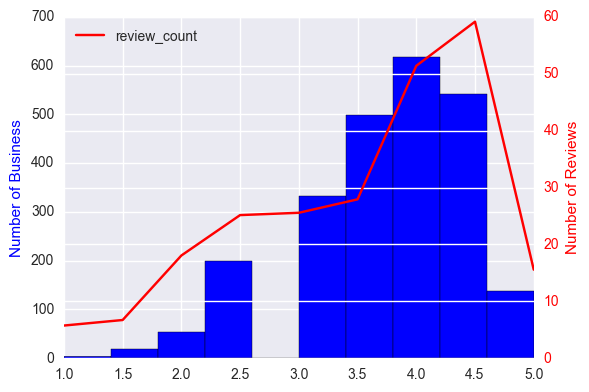

In [53]:
## Distribution of review based on stars
%matplotlib inline
fig, ax1 = plt.subplots()

ax1.hist(biz_coffee.stars,color='b')
ax1.set_ylabel('Number of Business', color='b')


ax2 = ax1.twinx()

ax2.plot(count_summary, color='r')

ax2.set_ylabel('Number of Reviews', color='r')
ax2.tick_params('y',colors='r')


ax1,ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()
#plt.hist(x=biz_coffee.stars)


## Findings: 
(1) More people reviewed the 3.5-4.5 star-rated shops
(2) There are more business rated in the range of 3.5-4,5
(3) The causation aspect is yet to be tested, does more review contribute to better rating, or vice versa

In [55]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685066 entries, 0 to 2685065
Data columns (total 10 columns):
Unnamed: 0      int64
user_id         object
review_id       object
votes.cool      int64
business_id     object
votes.funny     int64
stars           int64
date            object
type            object
votes.useful    int64
dtypes: int64(5), object(5)
memory usage: 204.9+ MB


In [56]:
print('The Review spans from {} to {}'.format(review['date'].min(),review['date'].max()))

The Review spans from 2004-10-12 to 2016-07-19


In [57]:
copy_review = review

In [58]:
copy_review['votes_review'] = copy_review['votes.cool']+copy_review['votes.funny']+copy_review['votes.useful']

In [59]:
v = copy_review.votes_review.groupby(copy_review.business_id).sum()

In [60]:
copy_review['Total_Votes'] = copy_review.business_id.map(v)

In [61]:
review_cols = ['business_id','Total_Votes']

In [62]:
copy_review = copy_review[review_cols]

In [63]:
copy_review.head(10)

,business_id,Total_Votes
0,5UmKMjUEUNdYWqANhGckJw,3
1,5UmKMjUEUNdYWqANhGckJw,3
2,5UmKMjUEUNdYWqANhGckJw,3
3,5UmKMjUEUNdYWqANhGckJw,3
4,5UmKMjUEUNdYWqANhGckJw,3
5,5UmKMjUEUNdYWqANhGckJw,3
6,5UmKMjUEUNdYWqANhGckJw,3
7,UsFtqoBl7naz8AVUBZMjQQ,0
8,UsFtqoBl7naz8AVUBZMjQQ,0
9,UsFtqoBl7naz8AVUBZMjQQ,0


In [64]:
copy_review.drop_duplicates('business_id',inplace = True)

/Users/veronica/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [65]:
copy_review.head()

,business_id,Total_Votes
0,5UmKMjUEUNdYWqANhGckJw,3
7,UsFtqoBl7naz8AVUBZMjQQ,0
12,cE27W9VPgO88Qxe4ol6y_g,2
17,mVHrayjG3uZ_RLHkLj-AMg,26
42,mYSpR_SLPgUVymYOvTQd_Q,0


In [66]:
review = copy_review.copy()

In [67]:
review_coffee = pd.merge(biz_coffee, review,  on='business_id')
review_coffee.head()

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes
0,True,False,3gmBc0qN_LtGbZAjTtHWZg,True,2.0,False,25,True,False,True,True,3.5,40.407091,-79.916958,False,True,71
1,True,False,83_p9vIqOq1TUIf3_GD7bA,True,1.0,False,117,True,False,True,True,4.5,40.474888,-79.918866,False,True,156
2,False,False,PzG0XmAmtXFs6Fdnubf41g,True,1.0,False,144,True,False,True,False,4.0,40.464485,-79.935388,False,True,225
3,False,False,xMekAmDsCdhk21Buf9ucSQ,False,1.0,False,4,True,False,False,False,5.0,40.453393,-80.006252,False,False,4
4,True,False,D9sHwmqlNkrVxmX-057i1g,True,1.0,False,11,False,False,True,False,1.5,40.432384,-79.893950,False,True,68


In [68]:
review_coffee.shape

(2390, 17)

Most coffee shops have reviews, by joining the table, we are not losing many rows (unreviewed business may be too new, hence do not need to be included in the prediction (12 businesses in total))

In [69]:
tip = pd.read_csv('yelp_academic_dataset_tip.csv')


In [70]:
tip.head()

,user_id,text,business_id,likes,date,type
0,ZxdojCZgZhw36xuSGaryRg,Pizza is garbage. Hoagies are excellent.,5UmKMjUEUNdYWqANhGckJw,0,2016-07-17,tip
1,-6rEfobYjMxpUWLNxszaxQ,Don't waste your time.,cE27W9VPgO88Qxe4ol6y_g,0,2013-04-18,tip
2,5OumCBQ_MyQsltSdbMyunA,Not easy to find. Be sure to put in directions...,mVHrayjG3uZ_RLHkLj-AMg,0,2016-02-22,tip
3,EZ0r9dKKtEGVx2CdnowPCw,Your GPS will not allow you to find this place...,mVHrayjG3uZ_RLHkLj-AMg,1,2013-01-06,tip
4,xb6zEQCw9I-Gl0g06e1KsQ,Great drink specials!,KayYbHCt-RkbGcPdGOThNg,0,2013-12-03,tip


In [71]:
tip.business_id.is_unique

False

In [72]:
t = tip.groupby(tip['business_id'])['business_id'].count()

In [73]:
t

business_id
--0ZoBTQWQra1FxD4rBWmg       2
--1emggGHgoG6ipd_RMb-g       7
--4Pe8BZ6gj57VFL5mUE8g       2
--5jkZ3-nUPZxUvtcbr8Uw      27
--BlvDO_RG2yElKu9XA1_g      23
--Dl2rW_xO8GuYBomlg9zw       1
--NCcmQqh_NZbjW1S5XsGQ       1
--UE_y6auTgq3FXlvUMkbw      40
--XBxRlD92RaV6TyUnP8Ow       2
--Y_2lDOtVDioX5bwF6GIw      11
--jFTZmywe7StuZ2hEjxyA       3
--nQiUBxtpjd_ZBuO_PH6w       1
--pOlFxITWnhzc7SHSIP0A      28
--qeSYxyn62mMjWvznNTdg       7
--sSW-WY3vyASh_eVPGUAw       3
--ytaF8wLE4-RsW8Cqx9CQ       1
-024YEtnIsPQCrMSHCKLQw       1
-0Ackw6MF82PXO9f9Jh_Kg      34
-0D_CYhlD2ILkmLR0pBmnA       2
-0GkcDiIgVm0XzDZC8RFOg      19
-0HGqwlfw3I8nkJyMHxAsQ       5
-0Oh0BEtQEC9OmmzZ_H5Bg      20
-0QBrNvhrPQCaeo7mTo0zQ       2
-0VK5Z1BfUHUYq4PoBYNLw       4
-0ZDRoepf3gwd9fpsw1bRQ      15
-0bUDim5OGuv8R0Qqq6J4A       9
-0lRv242OzyPUB8c5E_UhQ       3
-0vX54gYIgkTsOZaiPB2Bw       1
-0vgpat36Zkkf7RRhcAchA       1
-0xwm_AwS0d_5rwUprHGuw       6
-0zqgYIic5BUprV1xAabDg       1
-1-sUowC7fJ-cn7mCxvJ5w     

In [74]:
tip['Total_Tips'] = tip.business_id.map(t)

In [75]:
l = tip.groupby(tip['business_id'])['likes'].sum()

In [76]:
tip['Total_Likes'] = tip.business_id.map(l)

In [77]:
tip.head()

,user_id,text,business_id,likes,date,type,Total_Tips,Total_Likes
0,ZxdojCZgZhw36xuSGaryRg,Pizza is garbage. Hoagies are excellent.,5UmKMjUEUNdYWqANhGckJw,0,2016-07-17,tip,1,0
1,-6rEfobYjMxpUWLNxszaxQ,Don't waste your time.,cE27W9VPgO88Qxe4ol6y_g,0,2013-04-18,tip,1,0
2,5OumCBQ_MyQsltSdbMyunA,Not easy to find. Be sure to put in directions...,mVHrayjG3uZ_RLHkLj-AMg,0,2016-02-22,tip,2,1
3,EZ0r9dKKtEGVx2CdnowPCw,Your GPS will not allow you to find this place...,mVHrayjG3uZ_RLHkLj-AMg,1,2013-01-06,tip,2,1
4,xb6zEQCw9I-Gl0g06e1KsQ,Great drink specials!,KayYbHCt-RkbGcPdGOThNg,0,2013-12-03,tip,4,0


In [78]:
tip_cols = ['business_id','Total_Tips','Total_Likes']

In [79]:
tip = tip[tip_cols]

In [80]:
tip.head()

,business_id,Total_Tips,Total_Likes
0,5UmKMjUEUNdYWqANhGckJw,1,0
1,cE27W9VPgO88Qxe4ol6y_g,1,0
2,mVHrayjG3uZ_RLHkLj-AMg,2,1
3,mVHrayjG3uZ_RLHkLj-AMg,2,1
4,KayYbHCt-RkbGcPdGOThNg,4,0


In [81]:
tip.drop_duplicates(inplace = True)

In [82]:
review_coffee_tip = pd.merge(review_coffee,tip,on='business_id')

In [83]:
review_coffee_tip.shape

(2038, 19)

By merging the 2 and dropping the ones without tip features, we are not capturing more than 300 businesses

Solution: left join, and fill up the numbers with 0

In [84]:
review_coffee_tip = pd.merge(review_coffee,tip,on='business_id',how='left')

In [85]:
review_coffee_tip.head()

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes,Total_Tips,Total_Likes
0,True,False,3gmBc0qN_LtGbZAjTtHWZg,True,2.0,False,25,True,False,True,True,3.5,40.407091,-79.916958,False,True,71,2.0,0.0
1,True,False,83_p9vIqOq1TUIf3_GD7bA,True,1.0,False,117,True,False,True,True,4.5,40.474888,-79.918866,False,True,156,14.0,0.0
2,False,False,PzG0XmAmtXFs6Fdnubf41g,True,1.0,False,144,True,False,True,False,4.0,40.464485,-79.935388,False,True,225,26.0,1.0
3,False,False,xMekAmDsCdhk21Buf9ucSQ,False,1.0,False,4,True,False,False,False,5.0,40.453393,-80.006252,False,False,4,NaN,NaN
4,True,False,D9sHwmqlNkrVxmX-057i1g,True,1.0,False,11,False,False,True,False,1.5,40.432384,-79.893950,False,True,68,2.0,0.0


In [86]:
review_coffee_tip.shape

(2390, 19)

In [87]:
review_coffee_tip.describe(include='all')

/Users/veronica/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes,Total_Tips,Total_Likes
count,2390,2390,2390,2390,2390.000000,2390,2390.000000,2390,2390,2390,2390,2390.000000,2390.000000,2390.000000,2390,2390,2390.000000,2038.000000,2038.000000
unique,2,2,2390,2,NaN,2,NaN,2,2,2,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,True,False,R3kAGyaVGZt0Hhq9M46xPw,False,NaN,False,NaN,True,False,True,True,NaN,NaN,NaN,False,True,NaN,NaN,NaN
freq,1404,1625,1,1879,NaN,2188,NaN,1863,2378,1660,1904,NaN,NaN,NaN,2386,1644,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.457158,NaN,39.494979,NaN,NaN,NaN,NaN,3.732636,40.059790,-84.948229,NaN,NaN,76.953556,15.040236,0.244848
std,NaN,NaN,NaN,NaN,0.566996,NaN,81.998110,NaN,NaN,NaN,NaN,0.754962,7.573274,37.900442,NaN,NaN,183.093905,30.433528,0.808285
min,NaN,NaN,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,32.879273,-115.350920,NaN,NaN,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,NaN,3.000000,33.590252,-112.083655,NaN,NaN,7.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,4.000000,36.124586,-111.466308,NaN,NaN,24.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,NaN,39.750000,NaN,NaN,NaN,NaN,4.500000,45.494757,-73.612393,NaN,NaN,70.750000,NaN,NaN


In [88]:
review_coffee_tip.Total_Tips.fillna(0,inplace=True)
review_coffee_tip.Total_Likes.fillna(0,inplace=True)

In [89]:
review_coffee_tip.describe(include='all')

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes,Total_Tips,Total_Likes
count,2390,2390,2390,2390,2390.000000,2390,2390.000000,2390,2390,2390,2390,2390.000000,2390.000000,2390.000000,2390,2390,2390.000000,2390.000000,2390.000000
unique,2,2,2390,2,NaN,2,NaN,2,2,2,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,True,False,R3kAGyaVGZt0Hhq9M46xPw,False,NaN,False,NaN,True,False,True,True,NaN,NaN,NaN,False,True,NaN,NaN,NaN
freq,1404,1625,1,1879,NaN,2188,NaN,1863,2378,1660,1904,NaN,NaN,NaN,2386,1644,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.457158,NaN,39.494979,NaN,NaN,NaN,NaN,3.732636,40.059790,-84.948229,NaN,NaN,76.953556,12.825105,0.208787
std,NaN,NaN,NaN,NaN,0.566996,NaN,81.998110,NaN,NaN,NaN,NaN,0.754962,7.573274,37.900442,NaN,NaN,183.093905,28.603369,0.751395
min,NaN,NaN,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,32.879273,-115.350920,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,NaN,3.000000,33.590252,-112.083655,NaN,NaN,7.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,4.000000,36.124586,-111.466308,NaN,NaN,24.000000,4.000000,0.000000
75%,NaN,NaN,NaN,NaN,2.000000,NaN,39.750000,NaN,NaN,NaN,NaN,4.500000,45.494757,-73.612393,NaN,NaN,70.750000,13.000000,0.000000


In [90]:
review_coffee_tip.shape

(2390, 19)

In [91]:
checkin.head()

,checkin_info.9-0,checkin_info.9-1,checkin_info.9-2,checkin_info.9-3,checkin_info.9-4,checkin_info.9-5,checkin_info.9-6,checkin_info.20-2,checkin_info.20-3,checkin_info.20-0,checkin_info.20-1,checkin_info.20-6,checkin_info.20-4,checkin_info.20-5,business_id,checkin_info.12-1,checkin_info.12-0,checkin_info.12-3,checkin_info.12-2,checkin_info.12-5,checkin_info.12-4,checkin_info.12-6,checkin_info.2-1,checkin_info.15-6,checkin_info.15-4,checkin_info.15-5,checkin_info.15-2,checkin_info.15-3,checkin_info.15-0,checkin_info.15-1,checkin_info.17-1,checkin_info.1-1,checkin_info.22-4,checkin_info.22-5,checkin_info.22-6,checkin_info.22-0,checkin_info.22-1,checkin_info.22-2,checkin_info.22-3,checkin_info.2-0,checkin_info.11-2,checkin_info.11-3,checkin_info.11-0,checkin_info.11-1,checkin_info.11-6,checkin_info.11-4,checkin_info.11-5,checkin_info.16-5,checkin_info.16-4,checkin_info.16-6,checkin_info.16-1,checkin_info.16-0,checkin_info.16-3,checkin_info.16-2,checkin_info.1-0,checkin_info.7-2,checkin_info.1-2,checkin_info.1-3,checkin_info.1-4,checkin_info.1-5,checkin_info.1-6,checkin_info.7-3,checkin_info.7-0,checkin_info.4-1,checkin_info.4-0,checkin_info.4-3,checkin_info.4-2,checkin_info.4-5,checkin_info.4-4,checkin_info.2-5,checkin_info.4-6,checkin_info.2-6,checkin_info.5-2,checkin_info.5-3,checkin_info.19-2,checkin_info.19-3,checkin_info.19-0,checkin_info.19-1,checkin_info.19-6,checkin_info.19-4,checkin_info.19-5,checkin_info.2-3,checkin_info.2-2,checkin_info.6-5,checkin_info.2-4,checkin_info.5-4,checkin_info.5-5,checkin_info.5-6,checkin_info.7-1,checkin_info.7-6,checkin_info.5-1,checkin_info.7-4,checkin_info.7-5,checkin_info.3-2,checkin_info.6-2,checkin_info.21-6,checkin_info.21-5,checkin_info.21-4,checkin_info.21-3,checkin_info.21-2,checkin_info.21-1,checkin_info.21-0,checkin_info.8-5,checkin_info.8-4,checkin_info.8-6,type,checkin_info.8-0,checkin_info.8-3,checkin_info.8-2,checkin_info.5-0,checkin_info.17-0,checkin_info.8-1,checkin_info.17-2,checkin_info.17-3,checkin_info.17-4,checkin_info.17-5,checkin_info.17-6,checkin_info.14-3,checkin_info.14-2,checkin_info.14-1,checkin_info.14-0,checkin_info.14-6,checkin_info.14-5,checkin_info.14-4,checkin_info.13-4,checkin_info.13-5,checkin_info.13-6,checkin_info.13-0,checkin_info.13-1,checkin_info.13-2,checkin_info.13-3,checkin_info.10-6,checkin_info.10-5,checkin_info.10-4,checkin_info.10-3,checkin_info.10-2,checkin_info.10-1,checkin_info.10-0,checkin_info.3-5,checkin_info.23-1,checkin_info.23-0,checkin_info.23-3,checkin_info.23-2,checkin_info.23-5,checkin_info.23-4,checkin_info.23-6,checkin_info.3-0,checkin_info.0-5,checkin_info.0-4,checkin_info.0-6,checkin_info.0-1,checkin_info.0-0,checkin_info.0-3,checkin_info.0-2,checkin_info.3-6,checkin_info.6-6,checkin_info.3-4,checkin_info.6-4,checkin_info.6-3,checkin_info.3-3,checkin_info.6-1,checkin_info.6-0,checkin_info.3-1,checkin_info.18-6,checkin_info.18-5,checkin_info.18-4,checkin_info.18-3,checkin_info.18-2,checkin_info.18-1,checkin_info.18-0
0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cE27W9VPgO88Qxe4ol6y_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,checkin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mVHrayjG3uZ_RLHkLj-AMg,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [92]:
checkin.shape

(61049, 170)

In [93]:
checkin['Total_Checkin'] = checkin.sum(axis =1)

In [94]:
checkin = checkin[['Total_Checkin','business_id']]

In [95]:
checkin.business_id.is_unique

True

In [96]:
## Same concept as the above - left join, and fill na with 0
review_coffee_tip_checkin = pd.merge(review_coffee_tip,checkin,on='business_id',how='left')

In [97]:
review_coffee_tip_checkin.shape

(2390, 20)

In [98]:
review_coffee_tip_checkin.Total_Checkin.fillna(0,inplace=True)

In [99]:
review_coffee_tip_checkin.describe()

,attributes.Price Range,review_count,stars,latitude,longitude,Total_Votes,Total_Tips,Total_Likes,Total_Checkin
count,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000
mean,1.457158,39.494979,3.732636,40.059790,-84.948229,76.953556,12.825105,0.208787,227.505858
std,0.566996,81.998110,0.754962,7.573274,37.900442,183.093905,28.603369,0.751395,612.476447
min,1.000000,3.000000,1.000000,32.879273,-115.350920,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,3.000000,33.590252,-112.083655,7.000000,1.000000,0.000000,14.000000
50%,1.000000,16.000000,4.000000,36.124586,-111.466308,24.000000,4.000000,0.000000,53.000000
75%,2.000000,39.750000,4.500000,45.494757,-73.612393,70.750000,13.000000,0.000000,223.000000
max,4.000000,1487.000000,5.000000,55.990258,8.485440,2891.000000,477.000000,11.000000,17810.000000


In [100]:
review_coffee_tip_checkin.head()

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes,Total_Tips,Total_Likes,Total_Checkin
0,True,False,3gmBc0qN_LtGbZAjTtHWZg,True,2.0,False,25,True,False,True,True,3.5,40.407091,-79.916958,False,True,71,2.0,0.0,216.0
1,True,False,83_p9vIqOq1TUIf3_GD7bA,True,1.0,False,117,True,False,True,True,4.5,40.474888,-79.918866,False,True,156,14.0,0.0,272.0
2,False,False,PzG0XmAmtXFs6Fdnubf41g,True,1.0,False,144,True,False,True,False,4.0,40.464485,-79.935388,False,True,225,26.0,1.0,151.0
3,False,False,xMekAmDsCdhk21Buf9ucSQ,False,1.0,False,4,True,False,False,False,5.0,40.453393,-80.006252,False,False,4,0.0,0.0,10.0
4,True,False,D9sHwmqlNkrVxmX-057i1g,True,1.0,False,11,False,False,True,False,1.5,40.432384,-79.893950,False,True,68,2.0,0.0,12.0


# The above completes the merging of tables

In [112]:
data = review_coffee_tip_checkin.copy()

In [113]:
data.sort_values('stars',ascending=False).head()

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes,Total_Tips,Total_Likes,Total_Checkin
2246,True,False,KP0U4ff5YsUAtkhEw5icRg,False,1.0,False,26,True,False,True,True,5.0,33.827688,-111.924795,False,True,42,4.0,0.0,8.0
2279,False,False,af9ge1P4IsPNumEfofcNrg,False,2.0,False,3,True,False,True,True,5.0,55.937256,-3.207193,False,True,7,6.0,0.0,14.0
198,False,True,nXyxu-rRUtEkd2No0359Og,False,1.0,False,26,True,False,False,True,5.0,33.591764,-112.252544,False,False,86,5.0,0.0,106.0
280,True,True,CKjcewWeWvdJ7TzOQbZOIw,False,1.0,False,172,True,False,True,True,5.0,33.696760,-111.916061,False,True,220,31.0,1.0,321.0
1977,False,False,5bhwx5G19lHb5qC59FoB7w,False,2.0,False,4,False,False,False,True,5.0,45.544133,-73.595932,False,False,2,0.0,0.0,7.0


In [114]:
data.describe(include='all')

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes,Total_Tips,Total_Likes,Total_Checkin
count,2390,2390,2390,2390,2390.000000,2390,2390.000000,2390,2390,2390,2390,2390.000000,2390.000000,2390.000000,2390,2390,2390.000000,2390.000000,2390.000000,2390.000000
unique,2,2,2390,2,NaN,2,NaN,2,2,2,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,True,False,R3kAGyaVGZt0Hhq9M46xPw,False,NaN,False,NaN,True,False,True,True,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN
freq,1404,1625,1,1879,NaN,2188,NaN,1863,2378,1660,1904,NaN,NaN,NaN,2386,1644,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.457158,NaN,39.494979,NaN,NaN,NaN,NaN,3.732636,40.059790,-84.948229,NaN,NaN,76.953556,12.825105,0.208787,227.505858
std,NaN,NaN,NaN,NaN,0.566996,NaN,81.998110,NaN,NaN,NaN,NaN,0.754962,7.573274,37.900442,NaN,NaN,183.093905,28.603369,0.751395,612.476447
min,NaN,NaN,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,32.879273,-115.350920,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,NaN,3.000000,33.590252,-112.083655,NaN,NaN,7.000000,1.000000,0.000000,14.000000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,4.000000,36.124586,-111.466308,NaN,NaN,24.000000,4.000000,0.000000,53.000000
75%,NaN,NaN,NaN,NaN,2.000000,NaN,39.750000,NaN,NaN,NaN,NaN,4.500000,45.494757,-73.612393,NaN,NaN,70.750000,13.000000,0.000000,223.000000


In [105]:
data.shape

(2390, 20)

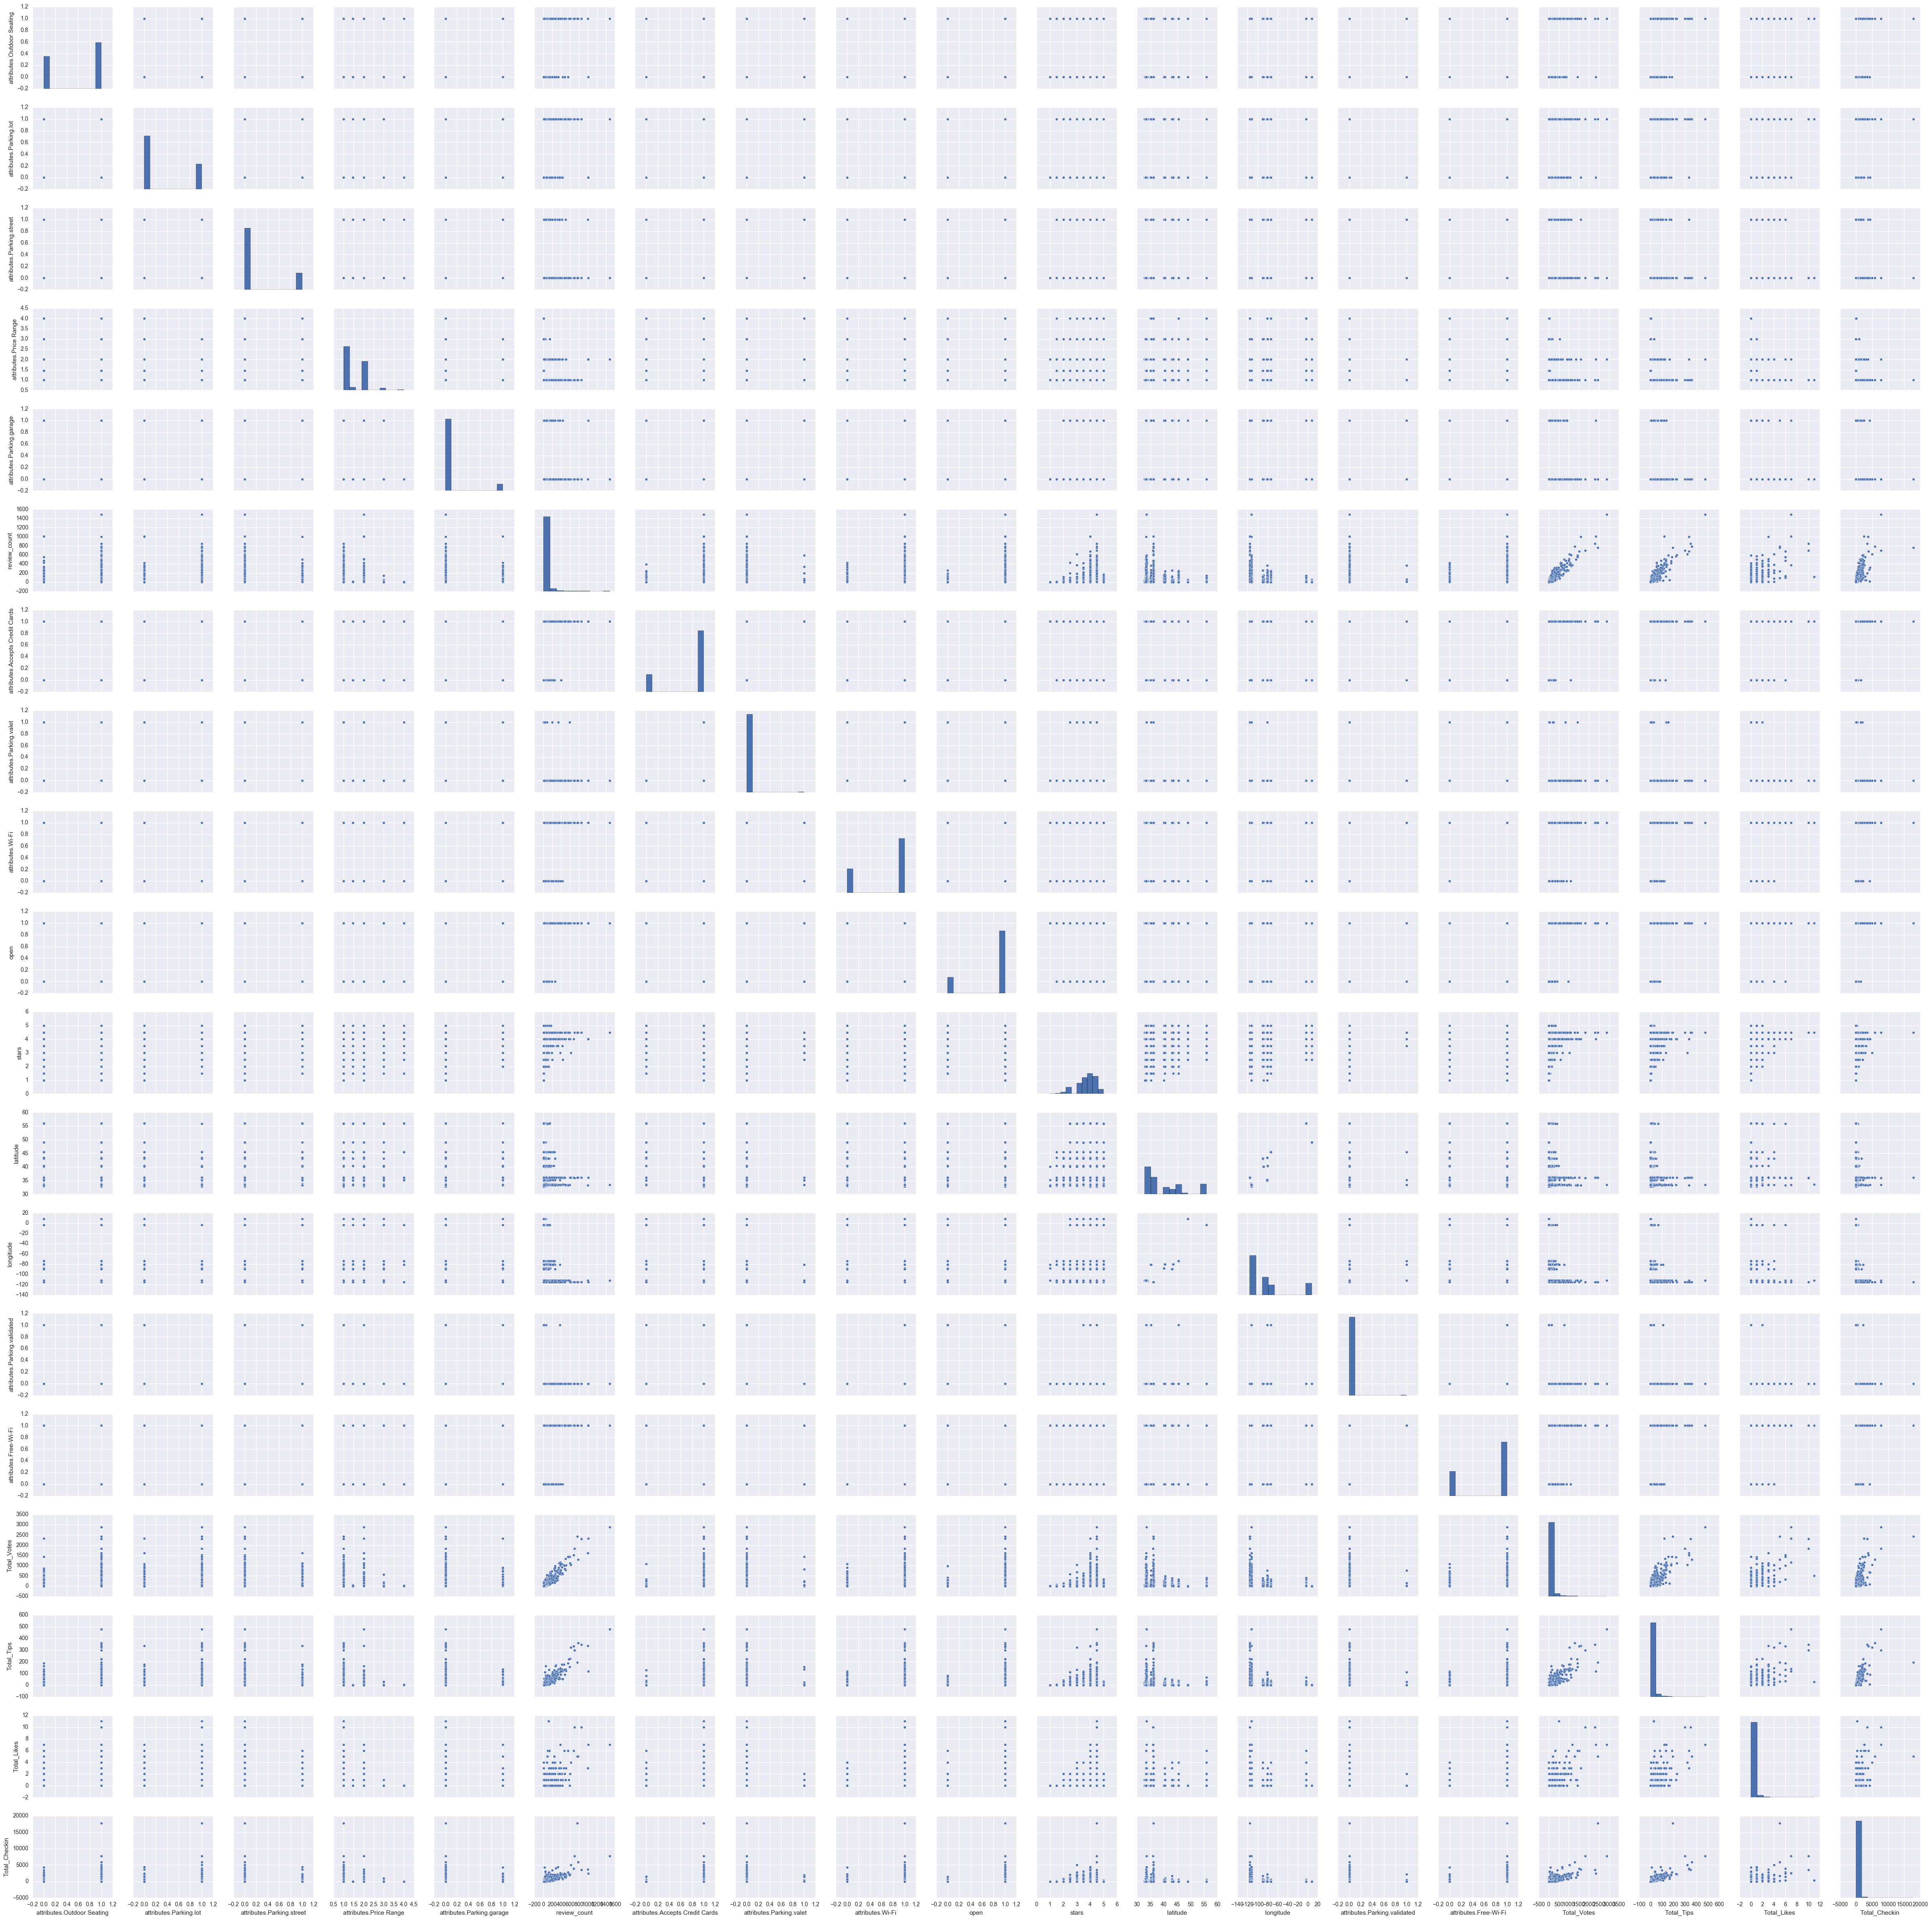

In [106]:
%matplotlib inline
sns.pairplot(data)

Try Simple Linear Regression

In [115]:
y = data.stars

In [116]:
# drop irrelevant features
x_drop_cols = ['business_id', 'stars']

In [117]:
X = data.drop(x_drop_cols,axis = 1)

In [118]:
X.shape

(2390, 18)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

In [120]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [121]:
lr = LinearRegression()
lr.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
lr.coef_

array([ 0.03027557,  0.06255366,  0.09588149, -0.08592491, -0.02828875,
        0.15370298, -0.02562835, -0.00573481, -0.16459669, -0.05914194,
        0.04642417,  0.09203144,  0.01621808,  0.11556424,  0.17794892,
       -0.18326564,  0.01448897, -0.08059063])

In [123]:
features_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient_LR': lr.coef_})
features_lr.sort_values(by = 'Coefficient_LR', ascending=False)

,Coefficient_LR,Feature
14,0.177949,Total_Votes
5,0.153703,review_count
13,0.115564,attributes.Free-Wi-Fi
2,0.095881,attributes.Parking.street
11,0.092031,longitude
1,0.062554,attributes.Parking.lot
10,0.046424,latitude
0,0.030276,attributes.Outdoor Seating
12,0.016218,attributes.Parking.validated
16,0.014489,Total_Likes


In [124]:
from sklearn.model_selection import KFold, cross_val_score

In [126]:
cv = KFold(n_splits=10, shuffle=True, random_state=7)

In [127]:
-np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_absolute_error', cv=cv))

0.56934001442601367

In [128]:
lr.score(X_test_std, y_test)

0.082848917592390658

In [129]:
y_pred = lr.predict(X_test_std)

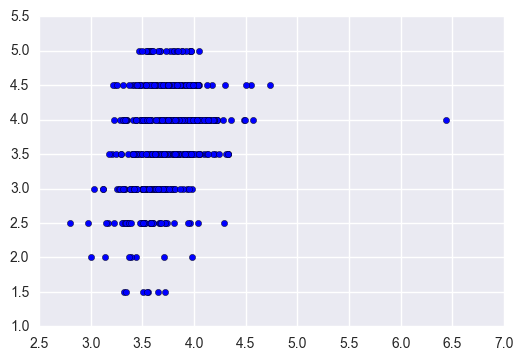

In [130]:
%matplotlib inline
plt.scatter(x = y_pred, y=y_test)

Conclusion on Simple Linear Regression Model: The model does not predict the star rating well, at each star, the model could be predicting completely something else

## Given above, will turn stars into preference, and the new goal is to predict classification

## Given the rating distribution, assume good ones are above 3.5 stars, and the rest are not

In [132]:
data['Rating'] = data.stars.map({0:0, 0.5:0, 1:0, 1.5:0, 2:0, 2.5:0, 3:0, 3.5:0, 4:1, 4.5:1, 5:1})

In [133]:
data.describe(include='all')

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes,Total_Tips,Total_Likes,Total_Checkin,Rating
count,2390,2390,2390,2390,2390.000000,2390,2390.000000,2390,2390,2390,2390,2390.000000,2390.000000,2390.000000,2390,2390,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000
unique,2,2,2390,2,NaN,2,NaN,2,2,2,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,True,False,R3kAGyaVGZt0Hhq9M46xPw,False,NaN,False,NaN,True,False,True,True,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN
freq,1404,1625,1,1879,NaN,2188,NaN,1863,2378,1660,1904,NaN,NaN,NaN,2386,1644,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.457158,NaN,39.494979,NaN,NaN,NaN,NaN,3.732636,40.059790,-84.948229,NaN,NaN,76.953556,12.825105,0.208787,227.505858,0.538912
std,NaN,NaN,NaN,NaN,0.566996,NaN,81.998110,NaN,NaN,NaN,NaN,0.754962,7.573274,37.900442,NaN,NaN,183.093905,28.603369,0.751395,612.476447,0.498588
min,NaN,NaN,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,32.879273,-115.350920,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,NaN,3.000000,33.590252,-112.083655,NaN,NaN,7.000000,1.000000,0.000000,14.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,4.000000,36.124586,-111.466308,NaN,NaN,24.000000,4.000000,0.000000,53.000000,1.000000
75%,NaN,NaN,NaN,NaN,2.000000,NaN,39.750000,NaN,NaN,NaN,NaN,4.500000,45.494757,-73.612393,NaN,NaN,70.750000,13.000000,0.000000,223.000000,1.000000


In [135]:
# price should not be converted to categorical, everything else with 'attribute' in it will be binary

In [134]:
for c in data.columns:
    if ('attributes' in c) and ('Price' not in c):
        data[c] = pd.Categorical(data[c])

In [137]:
data['open'] = pd.Categorical(data['open'])

In [138]:
data._get_numeric_data()

,attributes.Price Range,review_count,stars,latitude,longitude,Total_Votes,Total_Tips,Total_Likes,Total_Checkin,Rating
0,2.000000,25,3.5,40.407091,-79.916958,71,2.0,0.0,216.0,0
1,1.000000,117,4.5,40.474888,-79.918866,156,14.0,0.0,272.0,1
2,1.000000,144,4.0,40.464485,-79.935388,225,26.0,1.0,151.0,1
3,1.000000,4,5.0,40.453393,-80.006252,4,0.0,0.0,10.0,1
4,1.000000,11,1.5,40.432384,-79.893950,68,2.0,0.0,12.0,0
5,2.000000,8,4.5,40.392338,-80.066222,5,5.0,0.0,53.0,1
6,2.000000,20,3.5,40.440210,-80.002171,27,8.0,0.0,452.0,0
7,1.000000,66,4.0,40.441253,-80.003070,110,9.0,0.0,269.0,1
8,1.000000,88,4.5,40.451487,-79.982854,129,16.0,0.0,269.0,1
9,1.000000,5,3.5,40.441944,-80.003333,1,2.0,0.0,13.0,0


In [139]:
y = data.Rating

In [140]:
x_drop_cols = ['business_id', 'stars','Rating']

In [141]:
X = data.drop(x_drop_cols,axis=1)

In [142]:
X.shape

(2390, 18)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

In [144]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':np.linspace(1e-5, 1e5, 100),'class_weight':['balanced',None]}
lgreg = LogisticRegression()
clf = GridSearchCV(lgreg,parameters,cv = cv)
clf.fit(X_train_std,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [147]:
clf.best_params_

{'C': 1010.1010199999999, 'class_weight': 'balanced'}

In [148]:
clf.best_score_

0.65481171548117156

In [149]:
clf.best_estimator_.coef_

array([[ 0.08775621,  0.08255518,  0.2460405 , -0.18322702, -0.09474728,
         0.65879334, -0.05401421, -0.0372659 , -0.54849051, -0.12544635,
         0.14511429,  0.18836074,  0.02969661,  0.46670096,  1.13272486,
        -0.6086645 ,  0.07792596, -0.58773102]])

In [150]:
y_pred = clf.best_estimator_.predict(X_test_std)

In [151]:
from sklearn import metrics
accuracy_lgreg = metrics.accuracy_score(y_test,y_pred)
accuracy_lgreg

0.62761506276150625

In [152]:
f1_lgreg = metrics.f1_score(y_test,y_pred)
f1_lgreg

0.63223140495867769

In [154]:
auc_lgreg = cross_val_score(clf.best_estimator_, X_test_std, y_test, scoring='roc_auc', cv=10)
print('CV AUC {}, Average AUC {}'.format(auc_lgreg, auc_lgreg.mean()))

CV AUC [ 0.74414716  0.6958042   0.6451049   0.69230769  0.62587413  0.70804196
  0.68356643  0.54909091  0.77818182  0.52363636], Average AUC 0.66457555488


In [155]:
features_lgreg_table = pd.DataFrame({'Feature': X.columns, 'Coefficient_LgReg': clf.best_estimator_.coef_[0]})

In [156]:
features_lgreg_table.sort_values(by = 'Coefficient_LgReg',ascending=False)

,Coefficient_LgReg,Feature
14,1.132725,Total_Votes
5,0.658793,review_count
13,0.466701,attributes.Free-Wi-Fi
2,0.246041,attributes.Parking.street
11,0.188361,longitude
10,0.145114,latitude
0,0.087756,attributes.Outdoor Seating
1,0.082555,attributes.Parking.lot
16,0.077926,Total_Likes
12,0.029697,attributes.Parking.validated


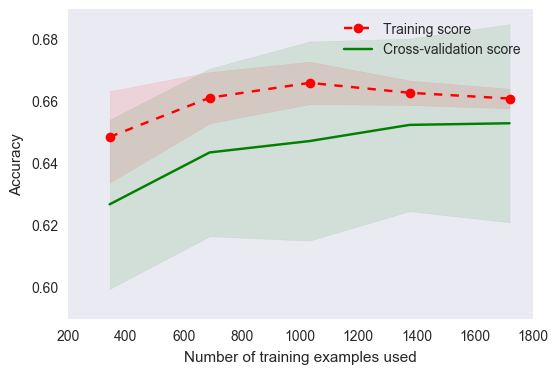

In [157]:
%matplotlib inline
draw_learning_curve(clf.best_estimator_, X_train_std, y_train, cv=cv,
                   scoring='accuracy');

Looks promising! The more data, the merrier

## Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 30)
    
rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [159]:
y_pred = rf.predict(X_test_std)

In [162]:
accuracy_rf = metrics.accuracy_score(y_test,y_pred)
accuracy_rf

0.65062761506276146

In [163]:
f1_rf= metrics.f1_score(y_test,y_pred)
f1_rf

0.67446393762183232

In [164]:
auc_rf = cross_val_score(rf, X_test_std, y_test, scoring='roc_auc', cv=10)
print('CV AUC {}, Average AUC {}'.format(auc_rf, auc_rf.mean()))

CV AUC [ 0.6680602   0.71153846  0.69667832  0.72465035  0.68881119  0.75611888
  0.6215035   0.57636364  0.81636364  0.61545455], Average AUC 0.687554271815


In [165]:
features = X.columns
feature_importances = rf.feature_importances_

features_rf = pd.DataFrame({'Feature': features, 'Importance Score_RF': feature_importances})
features_rf.sort_values('Importance Score_RF', inplace=True, ascending=False)

features_rf

,Feature,Importance Score_RF
11,longitude,0.166892
10,latitude,0.145369
17,Total_Checkin,0.144488
5,review_count,0.141140
14,Total_Votes,0.140113
15,Total_Tips,0.093265
3,attributes.Price Range,0.035448
9,open,0.022624
0,attributes.Outdoor Seating,0.019595
2,attributes.Parking.street,0.019550


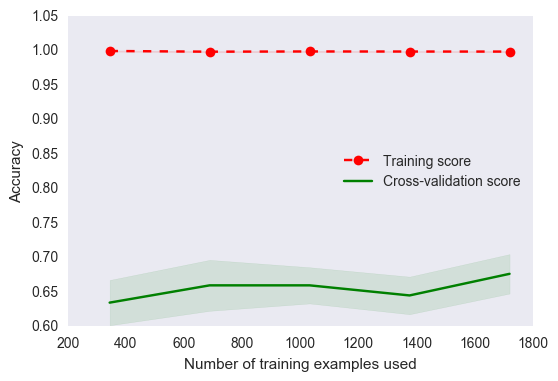

In [166]:
%matplotlib inline
draw_learning_curve(rf, X_train_std, y_train, cv=cv,
                   scoring='accuracy');

Join table to compare feature importance

In [167]:
feature_sel=pd.DataFrame()

In [168]:
feature_sel = pd.merge(features_lr,features_lgreg_table,on='Feature')
feature_sel

,Coefficient_LR,Feature,Coefficient_LgReg
0,0.030276,attributes.Outdoor Seating,0.087756
1,0.062554,attributes.Parking.lot,0.082555
2,0.095881,attributes.Parking.street,0.246041
3,-0.085925,attributes.Price Range,-0.183227
4,-0.028289,attributes.Parking.garage,-0.094747
5,0.153703,review_count,0.658793
6,-0.025628,attributes.Accepts Credit Cards,-0.054014
7,-0.005735,attributes.Parking.valet,-0.037266
8,-0.164597,attributes.Wi-Fi,-0.548491
9,-0.059142,open,-0.125446


In [169]:
feature_sel = pd.merge(feature_sel,features_rf,on='Feature')
feature_sel

,Coefficient_LR,Feature,Coefficient_LgReg,Importance Score_RF
0,0.030276,attributes.Outdoor Seating,0.087756,0.019595
1,0.062554,attributes.Parking.lot,0.082555,0.012613
2,0.095881,attributes.Parking.street,0.246041,0.019550
3,-0.085925,attributes.Price Range,-0.183227,0.035448
4,-0.028289,attributes.Parking.garage,-0.094747,0.008666
5,0.153703,review_count,0.658793,0.141140
6,-0.025628,attributes.Accepts Credit Cards,-0.054014,0.012320
7,-0.005735,attributes.Parking.valet,-0.037266,0.001253
8,-0.164597,attributes.Wi-Fi,-0.548491,0.011858
9,-0.059142,open,-0.125446,0.022624


In [171]:
f1 = pd.DataFrame({'F1_RF': f1_rf, 'F1_LogReg': f1_lgreg},index=np.arange(1))
f1

,F1_LogReg,F1_RF
0,0.632231,0.674464


In [172]:
auc = pd.DataFrame({'AUC_RF':auc_rf.mean(), 'AUC_LogReg':auc_lgreg.mean()},index=np.arange(1))
auc

,AUC_LogReg,AUC_RF
0,0.664576,0.687554


In [173]:
accuracy = pd.DataFrame({'Accuracy_RF':accuracy_rf, 'Accuracy_LogReg':accuracy_lgreg},index=np.arange(1))
accuracy

,Accuracy_LogReg,Accuracy_RF
0,0.627615,0.650628


LR will be just for reference, given the scores, we will prioritize the output by Random Forest and then Logistic Regression

In [174]:
feature_sel.sort_values(by = 'Importance Score_RF',ascending=False)

,Coefficient_LR,Feature,Coefficient_LgReg,Importance Score_RF
11,0.092031,longitude,0.188361,0.166892
10,0.046424,latitude,0.145114,0.145369
17,-0.080591,Total_Checkin,-0.587731,0.144488
5,0.153703,review_count,0.658793,0.141140
14,0.177949,Total_Votes,1.132725,0.140113
15,-0.183266,Total_Tips,-0.608664,0.093265
3,-0.085925,attributes.Price Range,-0.183227,0.035448
9,-0.059142,open,-0.125446,0.022624
0,0.030276,attributes.Outdoor Seating,0.087756,0.019595
2,0.095881,attributes.Parking.street,0.246041,0.019550


## Hand select the important columns that is intuitive to us based on the table above

In [199]:
x_cols = ['Total_Checkin','Total_Votes','review_count','Total_Tips','attributes.Free-Wi-Fi','attributes.Price Range']

In [200]:
X = data[x_cols]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

In [202]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [203]:
parameters = {'C':np.linspace(1e-5, 1e5, 100),'class_weight':['balanced',None]}
lgreg = LogisticRegression()
clf = GridSearchCV(lgreg,parameters,cv = cv)
clf.fit(X_train_std,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [204]:
clf.best_params_

{'C': 1010.1010199999999, 'class_weight': None}

In [205]:
clf.best_score_

0.63336820083682011

In [206]:
clf.best_estimator_.coef_

array([[-0.62868298,  1.10848748,  0.87315657, -0.7782914 , -0.08392645,
        -0.16304034]])

In [207]:
y_pred = clf.best_estimator_.predict(X_test_std)

In [208]:
accuracy_lgreg = metrics.accuracy_score(y_test,y_pred)
accuracy_lgreg

0.58368200836820083

In [209]:
f1_lgreg = metrics.f1_score(y_test,y_pred)
f1_lgreg

0.64014466546112114

In [210]:
auc_lgreg = cross_val_score(clf.best_estimator_, X_test_std, y_test, scoring='roc_auc', cv=10)
print('CV AUC {}, Average AUC {}'.format(auc_lgreg, auc_lgreg.mean()))

CV AUC [ 0.65551839  0.81818182  0.62062937  0.54895105  0.62062937  0.67132867
  0.57692308  0.58181818  0.78909091  0.52181818], Average AUC 0.640488902402


In [211]:
features_lgreg_table = pd.DataFrame({'Feature': X.columns, 'Coefficient_LgReg': clf.best_estimator_.coef_[0]})

In [212]:
features_lgreg_table.sort_values(by = 'Coefficient_LgReg',ascending=False)

,Coefficient_LgReg,Feature
1,1.108487,Total_Votes
2,0.873157,review_count
4,-0.083926,attributes.Free-Wi-Fi
5,-0.163040,attributes.Price Range
0,-0.628683,Total_Checkin
3,-0.778291,Total_Tips


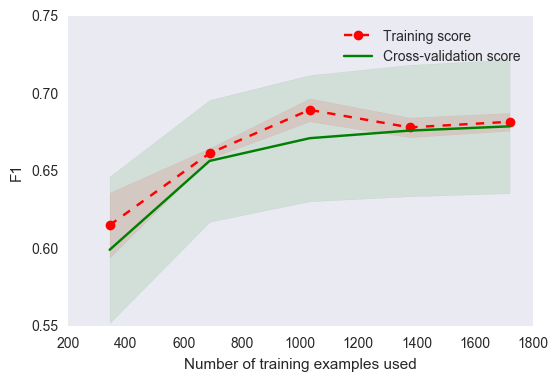

In [213]:
%matplotlib inline
draw_learning_curve(clf.best_estimator_, X_train_std, y_train, cv=cv,
                   scoring='f1');

Random Forest

In [214]:
rf = RandomForestClassifier(n_estimators = 30)
    
rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [215]:
y_pred = rf.predict(X_test_std)

In [216]:
accuracy_rf = metrics.accuracy_score(y_test,y_pred)
accuracy_rf

0.55648535564853552

In [217]:
f1_rf= metrics.f1_score(y_test,y_pred)
f1_rf

0.57936507936507931

In [218]:
auc_rf = cross_val_score(rf, X_test_std, y_test, scoring='roc_auc', cv=10)
print('CV AUC {}, Average AUC {}'.format(auc_rf, auc_rf.mean()))

CV AUC [ 0.54598662  0.54632867  0.65472028  0.6486014   0.73863636  0.6756993
  0.54982517  0.60545455  0.78636364  0.60272727], Average AUC 0.635434326543


In [219]:
features = X.columns
feature_importances = rf.feature_importances_

features_rf = pd.DataFrame({'Feature': features, 'Importance Score_RF': feature_importances})
features_rf.sort_values('Importance Score_RF', inplace=True, ascending=False)

features_rf

,Feature,Importance Score_RF
0,Total_Checkin,0.293045
1,Total_Votes,0.263134
2,review_count,0.222015
3,Total_Tips,0.145275
5,attributes.Price Range,0.047260
4,attributes.Free-Wi-Fi,0.029270


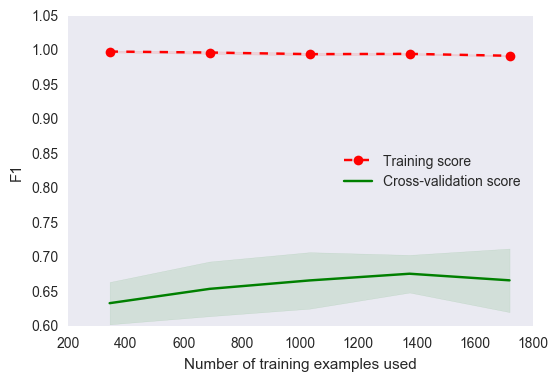

In [220]:
%matplotlib inline
draw_learning_curve(rf, X_train_std, y_train, cv=cv,
                   scoring='f1');

Join table to compare feature importance

In [221]:
feature_sel=pd.DataFrame()

In [222]:
feature_sel = pd.merge(features_rf,features_lgreg_table,on='Feature')
feature_sel.sort_values('Coefficient_LgReg',ascending=False)

,Feature,Importance Score_RF,Coefficient_LgReg
1,Total_Votes,0.263134,1.108487
2,review_count,0.222015,0.873157
5,attributes.Free-Wi-Fi,0.029270,-0.083926
4,attributes.Price Range,0.047260,-0.163040
0,Total_Checkin,0.293045,-0.628683
3,Total_Tips,0.145275,-0.778291


In [223]:
f1 = pd.DataFrame({'F1_RF': f1_rf, 'F1_LogReg': f1_lgreg},index=np.arange(1))
f1

,F1_LogReg,F1_RF
0,0.640145,0.579365


In [224]:
auc = pd.DataFrame({'AUC_RF':auc_rf.mean(), 'AUC_LogReg':auc_lgreg.mean()},index=np.arange(1))
auc

,AUC_LogReg,AUC_RF
0,0.640489,0.635434


In [225]:
accuracy = pd.DataFrame({'Accuracy_RF':accuracy_rf, 'Accuracy_LogReg':accuracy_lgreg},index=np.arange(1))
accuracy

,Accuracy_LogReg,Accuracy_RF
0,0.583682,0.556485


### Linear correlation proves to be a better assumption given the score, however, are there hidden features that we can extract base on this rich dataset?

In [226]:
data.head()

,attributes.Outdoor Seating,attributes.Parking.lot,business_id,attributes.Parking.street,attributes.Price Range,attributes.Parking.garage,review_count,attributes.Accepts Credit Cards,attributes.Parking.valet,attributes.Wi-Fi,open,stars,latitude,longitude,attributes.Parking.validated,attributes.Free-Wi-Fi,Total_Votes,Total_Tips,Total_Likes,Total_Checkin,Rating
0,True,False,3gmBc0qN_LtGbZAjTtHWZg,True,2.0,False,25,True,False,True,True,3.5,40.407091,-79.916958,False,True,71,2.0,0.0,216.0,0
1,True,False,83_p9vIqOq1TUIf3_GD7bA,True,1.0,False,117,True,False,True,True,4.5,40.474888,-79.918866,False,True,156,14.0,0.0,272.0,1
2,False,False,PzG0XmAmtXFs6Fdnubf41g,True,1.0,False,144,True,False,True,False,4.0,40.464485,-79.935388,False,True,225,26.0,1.0,151.0,1
3,False,False,xMekAmDsCdhk21Buf9ucSQ,False,1.0,False,4,True,False,False,False,5.0,40.453393,-80.006252,False,False,4,0.0,0.0,10.0,1
4,True,False,D9sHwmqlNkrVxmX-057i1g,True,1.0,False,11,False,False,True,False,1.5,40.432384,-79.893950,False,True,68,2.0,0.0,12.0,0


### Interaction: Price and Star

In [227]:
## star/price - higher, the better, i.e. for each dollar spent how much do you like this place?
data['value'] = data['stars'].divide(data['attributes.Price Range'])

### Ratios: Vote, Tip and Checkin taking into account the total number of review

In [228]:
## vote/review: the higher the better
data['vote_review'] = data.Total_Votes.divide(data.review_count)
## tip/review
data['tip_review'] = data.Total_Tips.divide(data.review_count)
## checkin/review
data['checkin_review'] = data.Total_Checkin.divide(data.review_count)

In [229]:
x_cols = ['value','vote_review','tip_review','checkin_review','review_count','attributes.Free-Wi-Fi']


In [230]:
X = data[x_cols]

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

In [232]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [233]:
parameters = {'C':np.linspace(1e-5, 1e5, 100),'class_weight':['balanced',None]}
lgreg = LogisticRegression()
clf = GridSearchCV(lgreg,parameters,cv = cv)
clf.fit(X_train_std,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [234]:
clf.best_params_

{'C': 1.0000000000000001e-05, 'class_weight': 'balanced'}

In [235]:
clf.best_score_

0.69508368200836823

In [236]:
clf.best_estimator_.coef_

array([[ 0.00482217,  0.00052059, -0.00103257, -0.00173847,  0.00149198,
        -0.00039317]])

In [237]:
y_pred = clf.best_estimator_.predict(X_test_std)

In [238]:
accuracy_lgreg = metrics.accuracy_score(y_test,y_pred)
accuracy_lgreg

0.66317991631799167

In [239]:
f1_lgreg = metrics.f1_score(y_test,y_pred)
f1_lgreg

0.66247379454926625

In [240]:
auc_lgreg = cross_val_score(clf.best_estimator_, X_test_std, y_test, scoring='roc_auc', cv=10)
print('CV AUC {}, Average AUC {}'.format(auc_lgreg, auc_lgreg.mean()))

CV AUC [ 0.76755853  0.87237762  0.8041958   0.71678322  0.77097902  0.81468531
  0.76398601  0.75272727  0.89454545  0.78363636], Average AUC 0.794147461234


In [241]:
features_lgreg_table = pd.DataFrame({'Feature': X.columns, 'Coefficient_LgReg': clf.best_estimator_.coef_[0]})

In [242]:
features_lgreg_table.sort_values(by = 'Coefficient_LgReg',ascending=False)

,Coefficient_LgReg,Feature
0,0.004822,value
4,0.001492,review_count
1,0.000521,vote_review
5,-0.000393,attributes.Free-Wi-Fi
2,-0.001033,tip_review
3,-0.001738,checkin_review


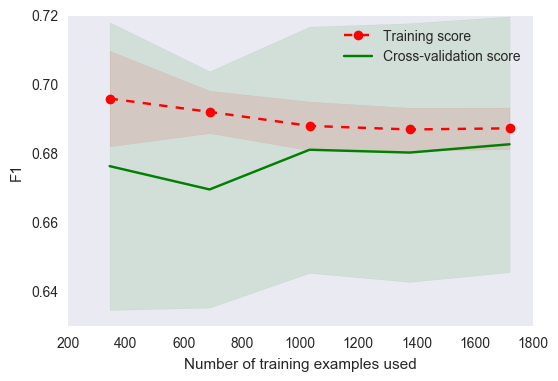

In [243]:
%matplotlib inline
draw_learning_curve(lgreg, X_train_std, y_train, cv=cv,
                   scoring='f1');

In [244]:
rf = RandomForestClassifier(n_estimators = 30)
    
rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [245]:
y_pred = rf.predict(X_test_std)

In [246]:
accuracy_rf = metrics.accuracy_score(y_test,y_pred)
accuracy_rf

0.93305439330543938

In [247]:
f1_rf= metrics.f1_score(y_test,y_pred)
f1_rf

0.93650793650793651

In [248]:
auc_rf = cross_val_score(rf, X_test_std, y_test, scoring='roc_auc', cv=10)
print('CV AUC {}, Average AUC {}'.format(auc_rf, auc_rf.mean()))

CV AUC [ 0.9180602   0.98601399  0.99825175  0.99388112  0.96066434  0.99125874
  0.98951049  0.95090909  0.99090909  0.91909091], Average AUC 0.969854971116


In [249]:
features = X.columns
feature_importances = rf.feature_importances_

features_rf = pd.DataFrame({'Feature': features, 'Importance Score_RF': feature_importances})
features_rf.sort_values('Importance Score_RF', inplace=True, ascending=False)

features_rf

,Feature,Importance Score_RF
0,value,0.634440
3,checkin_review,0.123800
4,review_count,0.085757
1,vote_review,0.077127
2,tip_review,0.065663
5,attributes.Free-Wi-Fi,0.013213


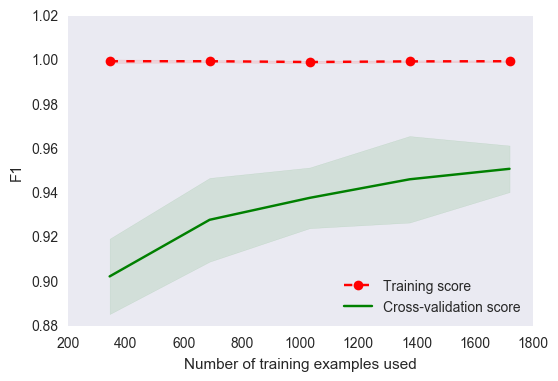

In [250]:
%matplotlib inline
draw_learning_curve(rf, X_train_std, y_train, cv=cv,
                   scoring='f1');

In [251]:
## The more data, the better

In [252]:
feature_sel=pd.DataFrame()

In [253]:
feature_sel = pd.merge(features_rf,features_lgreg_table,on='Feature')
feature_sel.sort_values('Coefficient_LgReg',ascending=False)

,Feature,Importance Score_RF,Coefficient_LgReg
0,value,0.634440,0.004822
2,review_count,0.085757,0.001492
3,vote_review,0.077127,0.000521
5,attributes.Free-Wi-Fi,0.013213,-0.000393
4,tip_review,0.065663,-0.001033
1,checkin_review,0.123800,-0.001738


In [254]:
f1 = pd.DataFrame({'F1_RF': f1_rf, 'F1_LogReg': f1_lgreg},index=np.arange(1))
f1

,F1_LogReg,F1_RF
0,0.662474,0.936508


In [255]:
auc = pd.DataFrame({'AUC_RF':auc_rf.mean(), 'AUC_LogReg':auc_lgreg.mean()},index=np.arange(1))
auc

,AUC_LogReg,AUC_RF
0,0.794147,0.969855


In [256]:
accuracy = pd.DataFrame({'Accuracy_RF':accuracy_rf, 'Accuracy_LogReg':accuracy_lgreg},index=np.arange(1))
accuracy

,Accuracy_LogReg,Accuracy_RF
0,0.66318,0.933054
